**Objetivo** predecir la habilidad de habla (**columna "speaking**") de un individuo en función de otras características como el idioma nativo (l1), el idioma adicional (l2), la edad, el sexo, la familia lingüística, y otros factores.






**Obtener Datos**



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = '/content/stex.csv.csv'

In [ ]:
df = pd.read_csv(url, encoding='latin-1')

In [ ]:
df.head()

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Sex,Family,ISO639.3,Enroll,Speaking,morph,lex,new_feat,new_sounds
0,Afrikaans,SouthAfrica,AfrikaansEnglish,English,25,0,4.0,Female,Indo-European,afr,93,496,NaN,0.010463,NaN,NaN
1,Afrikaans,SouthAfrica,AfrikaansGerman,German,47,2,4.0,Male,Indo-European,afr,93,542,NaN,0.010463,NaN,NaN
2,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,23,23,3.0,Female,Indo-European,afr,93,585,NaN,0.010463,NaN,NaN
3,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,42,2,2.0,Female,Indo-European,afr,93,521,NaN,0.010463,NaN,NaN
4,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,22,19,3.0,Female,Indo-European,afr,93,639,NaN,0.010463,NaN,NaN


**Analisís Exploratorio de Datos**


In [ ]:
# Quitar valores faltantes
df = df.dropna()
#df = df[df['ISO639.3']=='eng ']

In [ ]:
print("\nNúmero de filas y columnas del dataset:")
print(df.shape)


Número de filas y columnas del dataset:
(47232, 16)


In [ ]:
print("\nResumen de la información del dataset:")
print(df.info())


Resumen de la información del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 47232 entries, 301 to 50234
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   L1          47232 non-null  object 
 1   C           47232 non-null  object 
 2   L1L2        47232 non-null  object 
 3   L2          47232 non-null  object 
 4   AaA         47232 non-null  int64  
 5   LoR         47232 non-null  int64  
 6   Edu.day     47232 non-null  float64
 7   Sex         47232 non-null  object 
 8   Family      47232 non-null  object 
 9   ISO639.3    47232 non-null  object 
 10  Enroll      47232 non-null  int64  
 11  Speaking    47232 non-null  int64  
 12  morph       47232 non-null  float64
 13  lex         47232 non-null  float64
 14  new_feat    47232 non-null  float64
 15  new_sounds  47232 non-null  float64
dtypes: float64(5), int64(4), object(7)
memory usage: 6.1+ MB
None


In [ ]:
# Contar valores faltantes
print(df.isnull().sum())

L1            0
C             0
L1L2          0
L2            0
AaA           0
LoR           0
Edu.day       0
Sex           0
Family        0
ISO639.3      0
Enroll        0
Speaking      0
morph         0
lex           0
new_feat      0
new_sounds    0
dtype: int64


In [ ]:
print("\nEstadísticas descriptivas de las variables numéricas:")
df.describe()


Estadísticas descriptivas de las variables numéricas:


,AaA,LoR,Edu.day,Enroll,Speaking,morph,lex,new_feat,new_sounds
count,47232.000000,47232.000000,47232.000000,47232.000000,47232.000000,47232.000000,47232.000000,47232.000000,47232.000000
mean,26.499111,3.916476,3.137724,81.520982,517.745321,0.045661,0.408578,14.362868,20.090066
std,7.243453,4.240134,0.854258,25.147873,37.871203,0.045828,0.188669,5.612681,3.628497
min,0.000000,0.000000,1.000000,8.000000,270.000000,-0.017100,0.037325,6.000000,13.000000
25%,22.000000,2.000000,3.000000,70.000000,495.000000,0.012800,0.388004,11.000000,19.000000
50%,26.000000,3.000000,3.000000,86.000000,516.000000,0.047900,0.398649,14.000000,20.000000
75%,30.000000,5.000000,4.000000,100.000000,540.000000,0.063800,0.595079,21.000000,23.000000
max,88.000000,59.000000,4.000000,148.000000,685.000000,0.326900,0.595079,26.000000,27.000000


In [ ]:
print("\nEstadísticas descriptivas de las variables categóricas:")
df.describe(include=['object', 'category'])


Estadísticas descriptivas de las variables categóricas:


,L1,C,L1L2,L2,Sex,Family,ISO639.3
count,47232,47232,47232,47232,47232,47232,47232
unique,53,119,625,44,2,12,53
top,Arabic,Germany,GermanEnglish,English,Female,Indo-European,ara
freq,5927,4863,4335,25768,31224,32955,5927


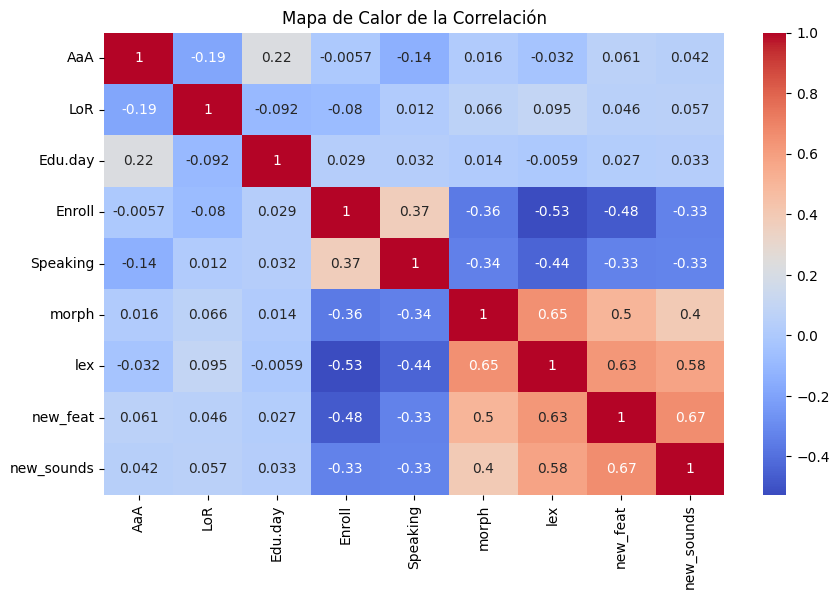

In [ ]:
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Crear el mapa de calor con las columnas numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de la Correlación')
plt.show()

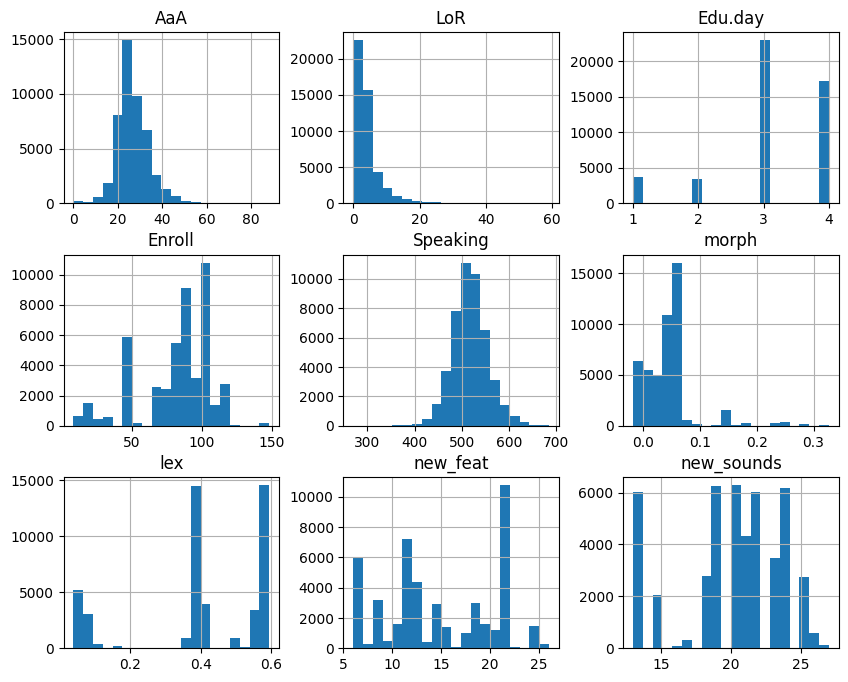

In [ ]:
# Crear histogramas para variables numéricas
df_numeric.hist(bins=20, figsize=(10, 8))
plt.show()

In [ ]:
# Seleccionar solo las columnas categoricas
df_categorical = df.select_dtypes(include=['object'])

df_categorical.head()


,L1,C,L1L2,L2,Sex,Family,ISO639.3
301,Albanian,Albania,AlbanianEnglish,English,Male,Indo-European,sqi
302,Albanian,Albania,AlbanianGerman,German,Female,Indo-European,sqi
303,Albanian,Yugoslavia,AlbanianCroatian,Croatian,Female,Indo-European,sqi
304,Albanian,Albania,AlbanianEnglish,English,Female,Indo-European,sqi
305,Albanian,Albania,AlbanianGreek,Greek,Female,Indo-European,sqi


In [ ]:
print(df.columns)

Index(['L1', 'C', 'L1L2', 'L2', 'AaA', 'LoR', 'Edu.day', 'Sex', 'Family',
       'ISO639.3', 'Enroll', 'Speaking', 'morph', 'lex', 'new_feat',
       'new_sounds'],
      dtype='object')


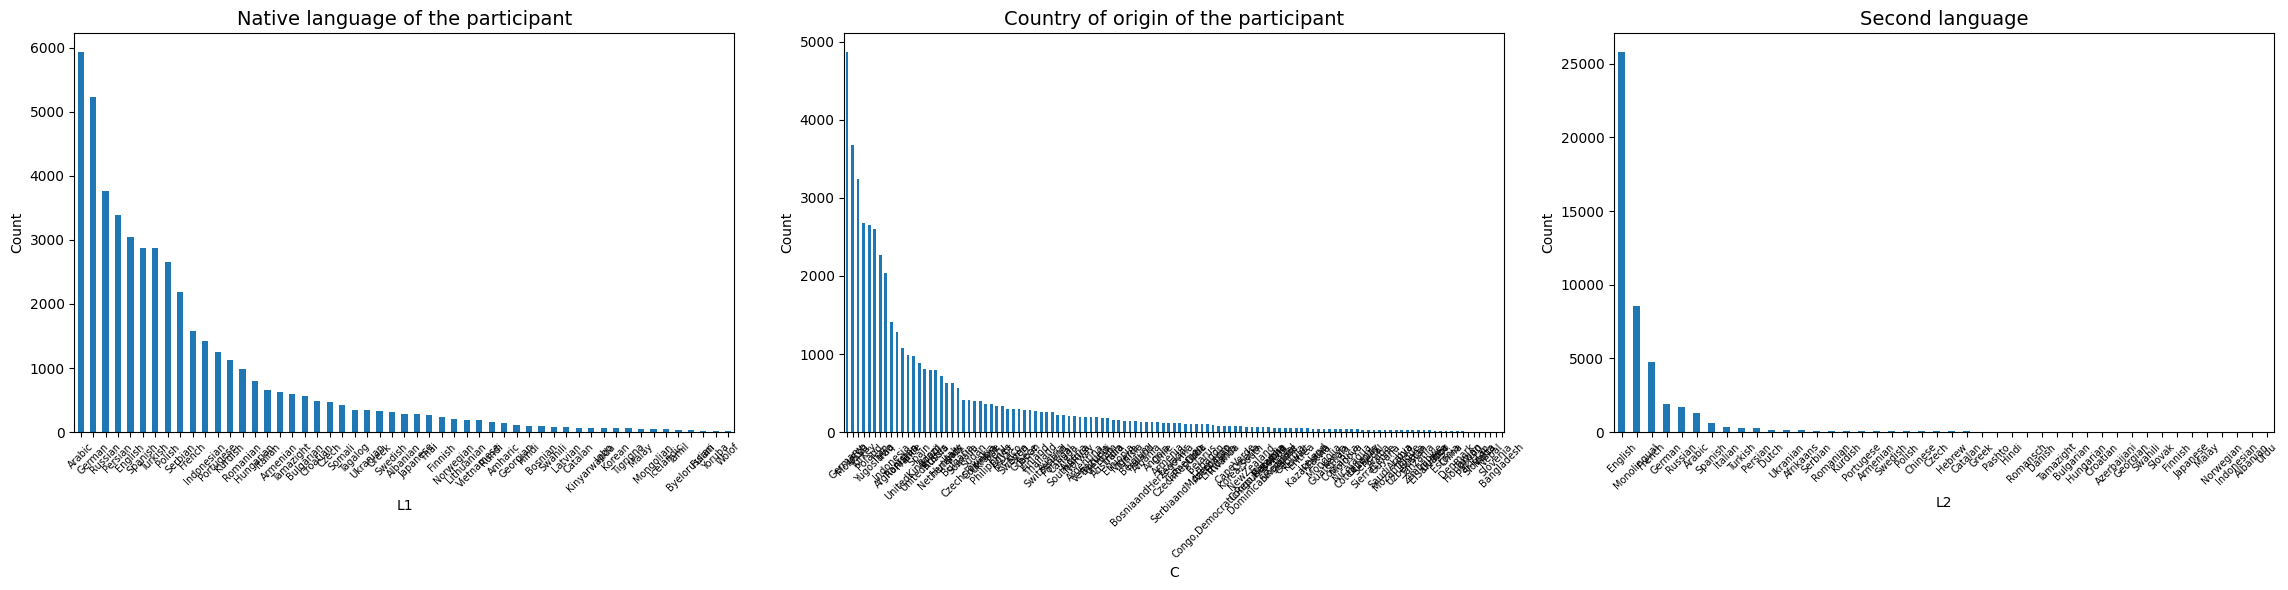

In [ ]:
# Crear una figura con 3 subplots en una fila
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Ajustar el tamaño de la fuente de las etiquetas del eje x
plt.rcParams.update({'font.size': 10})

# Gráfico 1: Native language of the participant
df['L1'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Native language of the participant', fontsize=14)
axes[0].set_xlabel('L1', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)
axes[0].tick_params(axis='x', labelrotation=45, labelsize=7)


# Gráfico 2: Country of origin of the participant
df['C'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Country of origin of the participant', fontsize=14)
axes[1].set_xlabel('C', fontsize=10)
axes[1].set_ylabel('Count', fontsize=10)
axes[1].tick_params(axis='x', labelrotation=45, labelsize=7)


# Gráfico 3: Second language
df['L2'].value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('Second language', fontsize=14)
axes[2].set_xlabel('L2', fontsize=10)
axes[2].set_ylabel('Count', fontsize=10)
axes[2].tick_params(axis='x', labelrotation=45, labelsize=7)

plt.tight_layout()
plt.show()

In [ ]:
df = df[[ 'L2', 'AaA', 'LoR', 'Sex', 'Family', 'Enroll', 'Speaking']]

In [ ]:
df['Family'] = df['Family'].apply(lambda x: 'Indo-European' if x == 'Indo-European' else 'Other Language Family')

In [ ]:
df['L2'] = df['L2'].apply(lambda x: 'Monolingual' if x == 'Monolingual' else 'Multilingual')

In [ ]:
df

,L2,AaA,LoR,Sex,Family,Enroll,Speaking
301,Multilingual,17,3,Male,Indo-European,78,515
302,Multilingual,23,1,Female,Indo-European,78,521
303,Multilingual,22,3,Female,Indo-European,85,519
304,Multilingual,30,3,Female,Indo-European,78,528
305,Multilingual,17,1,Female,Indo-European,78,481
...,...,...,...,...,...,...,...
50230,Multilingual,29,8,Male,Other Language Family,35,514
50231,Multilingual,28,2,Female,Other Language Family,35,505
50232,Multilingual,27,12,Female,Other Language Family,35,502
50233,Multilingual,26,2,Male,Other Language Family,35,426


⚠️ **Dividir datos en entrenamiento (train) y prueba
(test) ⚠️**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
# Definir las características (X) y la variable objetivo (y)
X = df.drop(columns=['Speaking'])  # Aquí estamos eliminando la columna 'costos (dólares)', que es el objetivo
y = df['Speaking']  # Esta es nuestra variable objetivo

In [ ]:
# Dividir el conjunto de datos en entrenamiento (train) y prueba (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Ver el tamaño de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}. Tamaño de las etiquetas de entrenamiento: {y_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}. Tamaño de las etiquetas de prueba: {y_test.shape}")

Tamaño del conjunto de entrenamiento: (37785, 6). Tamaño de las etiquetas de entrenamiento: (37785,)
Tamaño del conjunto de prueba: (9447, 6). Tamaño de las etiquetas de prueba: (9447,)


**Ingenieria de Caracteristicas**

In [ ]:
# Define cuáles columnas son categoricas y cuáles son numéricas
categorical_columns = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
print("Columnas Categóricas:")
for col in categorical_columns:
    print(f"- {col}")

print("\nColumnas Numéricas:")
for col in numerical_columns:
    print(f"- {col}")

Columnas Categóricas:
- L2
- Sex
- Family

Columnas Numéricas:
- AaA
- LoR
- Enroll


In [ ]:
# Crea un preprocesador que aplique tanto one-hot encoding para las variables categóricas como escalado para las variables numéricas.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Estandarizar características numéricas
        ('cat', OneHotEncoder(sparse_output=False), categorical_columns)  # Codificación one-hot para las características categóricas
    ])

Solo empleamos fit_transform en X_train para adiestrar los parámetros de la transformación. Después, utilizamos estos parámetros adquiridos en X_test utilizando solo transform, previniendo la pérdida de datos y promoviendo la expansión del modelo.

In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Los nombres de las columnas numéricas columnas no cambian después de la transformación
nombres_columnas_numericas = numerical_columns

# El método get_feature_names_out genera los nombres de las nuevas columnas creadas por OneHotEncoder para las columnas categóricas
nombres_columnas_categoricas = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Combinar los nombres de las columnas numéricas y categóricas en una lista
nombres_todas_las_columnas = list(nombres_columnas_numericas) + list(nombres_columnas_categoricas)

# Convertir la matriz en un DataFrame con los nombres de las columnas
X_train_processed_df = pd.DataFrame(X_train_processed, columns=nombres_todas_las_columnas)

X_train_processed_df.head()

,AaA,LoR,Enroll,L2_Monolingual,L2_Multilingual,Sex_Female,Sex_Male,Family_Indo-European,Family_Other Language Family
0,-1.032891,-0.686751,0.777632,0.0,1.0,1.0,0.0,1.0,0.0
1,-0.204853,-0.453005,-2.481138,0.0,1.0,0.0,1.0,1.0,0.0
2,-0.204853,-0.219258,-1.368387,1.0,0.0,0.0,1.0,0.0,1.0
3,0.485179,-0.453005,0.141774,1.0,0.0,0.0,1.0,1.0,0.0
4,2.003249,-0.453005,0.459703,0.0,1.0,1.0,0.0,1.0,0.0


**Modelaje de Supervisión: Regresión**

En machine learning, es común entrenar varios modelos que sean apropiados para la tarea en cuestión (en este caso, regresión) y luego elegir el mejor modelo basado en su rendimiento. En este paso se pueden entrenar tantos modelos simples como modelos de ensamble.

En este ejemplo vamos a entrenar los siguientes modelos:

Regresión Lineal

Árbol de Decisión

Random Forest (Ensamble)

Gradient Boosting (Ensamble)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Entrenamos la regresión lineal
modelo_regresion_lineal = LinearRegression()
modelo_regresion_lineal.fit(X_train_processed_df, y_train)

LinearRegression()

In [ ]:
# Entrenamos el árbol de decisión
modelo_arbol_decision = DecisionTreeRegressor()
modelo_arbol_decision.fit(X_train_processed_df, y_train)

DecisionTreeRegressor()

In [ ]:
# Entrenamos el Random Forest
modelo_random_forest = RandomForestRegressor()
modelo_random_forest.fit(X_train_processed_df, y_train)

RandomForestRegressor()

In [ ]:
# Entrenamos el Gradient Boosting
modelo_gradient_boosting = GradientBoostingRegressor()
modelo_gradient_boosting.fit(X_train_processed_df, y_train)

GradientBoostingRegressor()

**Evalución del Modelo**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import numpy as np

In [ ]:

# Define a function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:

# Create scorers for RMSE and R-squared
rmse_scorer = make_scorer(rmse, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

In [ ]:

# Definir los modelos
models = [
    ('Regresión Lineal', modelo_regresion_lineal),
    ('Árbol de Decisión', modelo_arbol_decision),
    ('Random Forest', modelo_random_forest),
    ('Gradient Boosting', modelo_gradient_boosting)
]

In [ ]:
# Calcular y almacenar las métricas
results = []
for name, model in models:
    rmse_scores = cross_val_score(model, X_train_processed_df, y_train, scoring=rmse_scorer, cv=5)  # Use 5-fold cross-validation
    r2_scores = cross_val_score(model, X_train_processed_df, y_train, scoring=r2_scorer, cv=5)
    results.append([name, -rmse_scores.mean(), r2_scores.mean()])  # Negate RMSE for sorting

In [ ]:

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results, columns=['Modelo', 'RMSE', 'R2'])

In [ ]:
# Mostrar los resultados ordenados por RMSE
print(results_df.sort_values(['RMSE', 'R2'], ascending=[True, False]).round(2))

              Modelo   RMSE    R2
3  Gradient Boosting  31.78  0.29
0   Regresión Lineal  33.68  0.20
2      Random Forest  34.31  0.17
1  Árbol de Decisión  39.31 -0.09


In [ ]:
# Coeficientes del modelo
coeficientes = modelo_regresion_lineal.coef_

In [ ]:
for nombre, coef in zip(nombres_todas_las_columnas, coeficientes):
    print(f"Característica: {nombre:<20} Coeficiente: {coef:.4f}")

Característica: AaA                  Coeficiente: -5.6596
Característica: LoR                  Coeficiente: 1.5536
Característica: Enroll               Coeficiente: 10.2717
Característica: L2_Monolingual       Coeficiente: -5.5773
Característica: L2_Multilingual      Coeficiente: 5.5773
Característica: Sex_Female           Coeficiente: 4.5260
Característica: Sex_Male             Coeficiente: -4.5260
Característica: Family_Indo-European Coeficiente: 6.5441
Característica: Family_Other Language Family Coeficiente: -6.5441


In [ ]:
# Obtener el valor de la intersección
intercepto = modelo_regresion_lineal.intercept_
intercepto

510.1404448468855

In [ ]:
std = df.select_dtypes(include=['number']).std().to_frame(name='Desviación Estándar').rename_axis('Característica').reset_index()
std

,Característica,Desviación Estándar
0,AaA,7.243453
1,LoR,4.240134
2,Edu.day,0.854258
3,Enroll,25.147873
4,Speaking,37.871203
5,morph,0.045828
6,lex,0.188669
7,new_feat,5.612681
8,new_sounds,3.628497


In [ ]:
# Características numéricas y categóricas
caracteristicas_numericas = list(nombres_columnas_numericas)
caracteristicas_categoricas = list(nombres_columnas_categoricas)

# Desviaciones estándar de las características numéricas
std_numericas = std[std['Característica'].isin(caracteristicas_numericas)]['Desviación Estándar'].values

# Coeficientes desescalados para características numéricas
coeficientes_desescalados_numericos = coeficientes[:len(caracteristicas_numericas)] / std_numericas

# Coeficientes categóricos no necesitan desescalarse
coeficientes_categoricos = coeficientes[len(caracteristicas_numericas):]

# Unir coeficientes desescalados
coeficientes_desescalados = np.concatenate([coeficientes_desescalados_numericos, coeficientes_categoricos])

# Ajustar el intercepto si es necesario
media_numericas = preprocessor.named_transformers_['num'].mean_
intercepto_desescalado = intercepto - np.sum(coeficientes[:len(caracteristicas_numericas)] * media_numericas / std_numericas)


# Crear la tabla final
tabla_final = pd.DataFrame({
    'Característica': caracteristicas_numericas + caracteristicas_categoricas,
    'Desviación Estándar': list(std_numericas) + ['N/A'] * len(caracteristicas_categoricas),
    'Coeficiente Original': coeficientes,
    'Coeficiente Desescalado': coeficientes_desescalados
})

# Añadir el intercepto
tabla_intercepto = pd.DataFrame({
    'Característica': ['y_intercepto'],
    'Desviación Estándar': ['N/A'],
    'Coeficiente Original': [intercepto],
    'Coeficiente Desescalado': [intercepto_desescalado]
})

# Unir las tablas
tabla_final = pd.concat([tabla_final, tabla_intercepto], ignore_index=True)

tabla_final

,Característica,Desviación Estándar,Coeficiente Original,Coeficiente Desescalado
0,AaA,7.243453,-5.659559,-0.781334
1,LoR,4.240134,1.553631,0.366411
2,Enroll,25.147873,10.271739,0.408454
3,L2_Monolingual,N/A,-5.577282,-5.577282
4,L2_Multilingual,N/A,5.577282,5.577282
5,Sex_Female,N/A,4.525982,4.525982
6,Sex_Male,N/A,-4.525982,-4.525982
7,Family_Indo-European,N/A,6.544065,6.544065
8,Family_Other Language Family,N/A,-6.544065,-6.544065
9,y_intercepto,N/A,510.140445,496.129244


**Intrepretado Modelo**

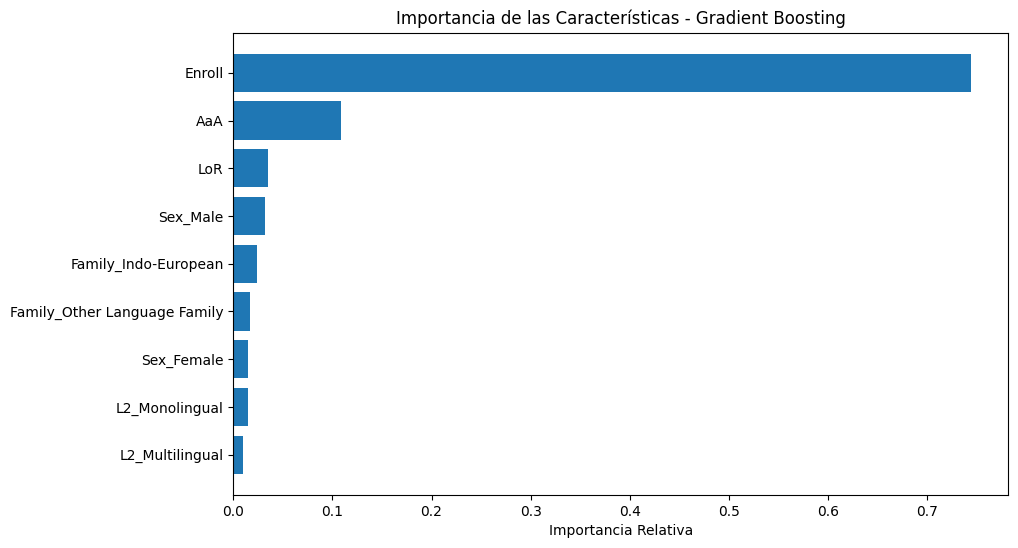

In [ ]:
# Obtenemos la importancia de las características del modelo de Gradient Boosting
importancia_caracteristicas = modelo_gradient_boosting.feature_importances_

# Ordenamos las características por importancia
indices = np.argsort(importancia_caracteristicas)

# Graficamos la importancia de las características
plt.figure(figsize=(10, 6))
plt.title('Importancia de las Características - Gradient Boosting')
plt.barh(range(X_train_processed_df.shape[1]), importancia_caracteristicas[indices])
plt.yticks(range(X_train_processed_df.shape[1]), X_train_processed_df.columns[indices])
plt.xlabel('Importancia Relativa')
plt.show()

**Escoger el mejor modelo usando las métricas de rendimiento**


En este caso, el Gradient Boosting es la mejor opción, ya que tiene el RMSE más bajo y el R² más alto, lo que indica que es el modelo que mejor predice la habilidad de habla de este conjunto de datos.

**RMSE (Raíz del Error Cuadrático Medio)**


El **RMSE** mide el promedio de la diferencia entre los valores predichos y los valores reales. Un valor más bajo de RMSE indica que el modelo tiene menos errores de predicción en promedio.
El Gradient Boosting tiene un RMSE de 31.78, lo que significa que, en promedio, las predicciones del modelo tienen un error de aproximadamente 31.78 unidades en la escala de la variable objetivo.


**R² (Coeficiente de Determinación)**

El Score **R2** determina cuánto del porcentaje de variabilidad de los datos es explicado por el modelo. Un valor de R2 próximo a 1 sugiere que el modelo puede explicar la mayoría de las variaciones en la capacidad de hablar. El Gradient Boosting presenta un R2 de 0.29, lo que señala que el modelo puede justificar el 29% de la variabilidad en la destreza verbal. En términos prácticos, esto significa que el modelo registra una porción moderada de las relaciones entre los atributos (L2, AaA, LoR, Sex, Family, Enroll) y la capacidad de habla. Todavía existe un 71% de variabilidad sin explicar, lo que indica que existen otros elementos que afectan la capacidad de habla que el modelo no ha identificado.

**Recomendaciones de Negocio y concluciones**

priorizar la atención a individuos que llegaron a temprana edad y con mayor tiempo de residencia, ofreciendo programas de idioma e integración cultural. Además, se sugiere adaptar los materiales de aprendizaje según el idioma nativo y si la persona es monolingüe o multilingüe, con apoyo específico para hablantes monolingües. Si bien con menor impacto, se deben considerar las necesidades específicas de género y familia lingüística en los programas. Es crucial investigar factores adicionales como nivel socioeconómico y educativo para comprender mejor la variabilidad en la habilidad de habla. Finalmente, se recomienda personalizar las intervenciones para maximizar su impacto en cada individuo.

**conclusión**

El análisis del dataset revela que la habilidad de habla está influenciada principalmente por la edad de llegada al nuevo país, la duración de la residencia, el idioma nativo y si la persona es monolingüe o multilingüe. Si bien el modelo predictivo desarrollado (Gradient Boosting) explica un 29% de la variabilidad en la destreza verbal, este porcentaje moderado indica la presencia de otros factores aún no identificados.